In [1]:
import datajoint as dj

In [2]:
import ephys

Connecting daveliu@mesoscale-activity.datajoint.io:3306


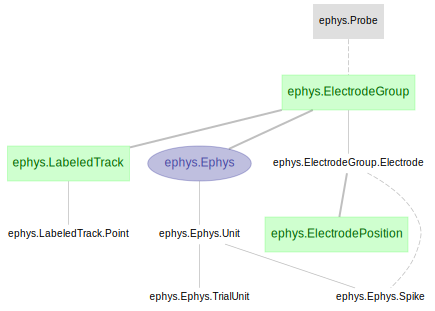

In [3]:
dj.ERD(ephys)

In [4]:
import scipy.io as spio
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
dj.ERD(ephys)-2

In [3]:
mouse=ephys.experiment.lab.Animal()
#mouse.insert1((123456, '2017-08-01'))
mouse

animal Janelia ANM ID (6 digits),dob
123456,2017-08-01
399752,2017-08-01
400482,2017-08-01
400483,2017-08-01


In [4]:
session=ephys.experiment.Session()
session

animal Janelia ANM ID (6 digits),session session number,session_date,username,rig
399752,1,2017-11-28,daveliu,RRig
399752,2,2017-11-29,daveliu,RRig
399752,3,2017-11-30,daveliu,RRig
399752,4,2017-12-01,daveliu,RRig
399752,5,2017-12-02,daveliu,RRig
399752,6,2017-12-03,daveliu,RRig
399752,7,2017-12-04,daveliu,RRig


In [5]:
rig=ephys.experiment.lab.Rig()
rig
#rig.insert1(('RRig','Recording Rig'))

rig,rig_description
RRig,Recording rig
TRig1,Training rig 1
TRig2,Training rig 2
TRig3,Training rig 3


In [6]:
ephys.Probe()

probe_part_no,probe_description
15131808323,neuropixels probe O3


In [7]:
eGroup=ephys.ElectrodeGroup()

In [ ]:
eGroup.insert1((123456, 1, 1, '15131808323', 'C:\\Users\\liul.HHMI\\Desktop\\real5ap_imec3_opt3_jrc.mat'))

In [ ]:
ephys.ElectrodeGroup().make(ephys.ElectrodeGroup().fetch1(dj.key))
electrode=eGroup.Electrode()

In [8]:
eGroup

animal Janelia ANM ID (6 digits),session session number,electrode_group Electrode_group is like the probe,probe_part_no,ephys_filepath


In [ ]:
electrode

In [ ]:
ephys1=ephys.Ephys()

In [ ]:
ephys1.populate()

In [ ]:
ephys1

In [ ]:
session.Trial() & 'animal =123456'

In [ ]:
spike=ephys1.Spike()

In [ ]:
spike

In [ ]:
unit1=(spike & 'unit = 24').fetch('spike_time','trial')
plt.subplot(211)
plt.plot(unit1[0],unit1[1],'.')
psth=np.histogram(np.asarray(unit1[0], dtype='float'),100)
plt.subplot(212)
psth[0]
plt.plot(psth[0])